# Import Library

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# 📦 General libraries
import os
import shutil
import numpy as np
import pandas as pd

# 📊 Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ⚙️ Sklearn - Data Preprocessing & Model Selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# 🧪 Sklearn - Metrics & Evaluation
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score
)

# 🤖 Sklearn - Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    IsolationForest
)
from sklearn.neighbors import KNeighborsClassifier

# 🌟 Boosting Libraries
from xgboost import XGBClassifier

# 🔧 Sampling & Optimization
from imblearn.over_sampling import SMOTE
from bayes_opt import BayesianOptimization

# 🌐 External Tools
import kagglehub


Penjelasan:

Mengimpor berbagai pustaka yang dibutuhkan untuk proses analisis data, visualisasi, preprocessing, modeling, evaluasi, hingga optimasi model.

- **pandas** dan **numpy**: Manipulasi data numerik dan tabular.
- **matplotlib** dan **seaborn**: Untuk eksplorasi dan visualisasi data.
- **scikit-learn**: Menyediakan alat bantu untuk preprocessing, pemodelan, evaluasi, dan seleksi model.
- **xgboost**: Pustaka boosting yang umum digunakan untuk klasifikasi dengan performa tinggi.
- **SMOTE**: Teknik penyeimbangan kelas dengan oversampling sintetis.
- **bayes_opt**: Untuk tuning hyperparameter model.
- **kagglehub**: Mengunduh dataset dari Kaggle langsung ke lingkungan kerja.


# Memuat Dataset

In [2]:
# Download latest version
path = kagglehub.dataset_download("alexteboul/diabetes-health-indicators-dataset")
print("Path to dataset files:", path)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6.03M/6.03M [00:02<00:00, 2.76MB/s]

Extracting files...


Path to dataset files: /home/ruvne/.cache/kagglehub/datasets/alexteboul/diabetes-health-indicators-dataset/versions/1


Penjelasan:

- Mengunduh dataset **"Diabetes Health Indicators"** dari repository Kaggle menggunakan `kagglehub`.
- Menyimpan path folder hasil download ke dalam variabel `path` agar bisa digunakan pada langkah selanjutnya.
- Mencetak lokasi folder tempat dataset disimpan.


In [3]:
new_dir = "diabetes_dataset"
plot_dir = "plots"
if os.path.exists(new_dir):
    shutil.rmtree(new_dir)
if os.path.exists(plot_dir):
    shutil.rmtree(plot_dir)
os.makedirs(new_dir, exist_ok=True)
os.makedirs(plot_dir, exist_ok=True)

Penjelasan:

- Mendefinisikan variabel `new_dir` sebagai nama folder lokal untuk menyimpan dataset (`diabetes_dataset`).
- Mendefinisikan variabel `plot_dir` sebagai nama folder lokal untuk menyimpan hasil visualisasi (`plots`).
- Jika folder `new_dir` atau `plot_dir` sudah ada, maka folder tersebut akan dihapus menggunakan `shutil.rmtree(...)`.
- Membuat ulang folder `new_dir` dan `plot_dir` menggunakan `os.makedirs(..., exist_ok=True)` untuk memastikan folder tersedia tanpa error jika sudah ada sebelumnya.

In [4]:
# move the files to a new directory
os.makedirs(new_dir, exist_ok=True)
for file_name in os.listdir(path):
    shutil.move(os.path.join(path, file_name), os.path.join(new_dir, file_name))

Penjelasan:

- `os.makedirs(..., exist_ok=True)` digunakan untuk membuat folder bernama `diabetes_dataset` jika belum ada.
- `os.listdir(path)` mengambil daftar semua file dari direktori tempat dataset diunduh.
- `shutil.move(...)` memindahkan setiap file dari folder unduhan ke folder lokal yang telah dibuat.


In [5]:
# Load the dataset
df = pd.read_csv(
    os.path.join(new_dir, "diabetes_binary_health_indicators_BRFSS2015.csv")
)

Penjelasan:

- `pd.read_csv(...)` digunakan untuk membaca file CSV dan memuatnya ke dalam bentuk DataFrame.
- `os.path.join(...)` menyusun path lengkap menuju file dataset yang telah dipindahkan ke folder `diabetes_dataset`.
- Hasil pembacaan disimpan dalam variabel `df` yang akan digunakan untuk proses analisis data berikutnya.


# Exploratory Data Analysis (EDA)

## EDA : Deskripsi Variabel

In [6]:
# Type your code here
data_info = {
    "Jumlah Baris": df.shape[0],
    "Jumlah Kolom": df.shape[1],
    "Tipe Data": df.dtypes.value_counts().to_dict(),
}

display(data_info)

{'Jumlah Baris': 253680,
 'Jumlah Kolom': 22,
 'Tipe Data': {dtype('float64'): 22}}

Penjelasan:

- `df.shape[0]` menghitung jumlah baris (data observasi).
- `df.shape[1]` menghitung jumlah kolom (fitur).
- `df.dtypes.value_counts()` menghitung berapa banyak kolom berdasarkan tipe datanya (seperti float64, int64, dll).
- Semua informasi dirangkum dalam dictionary `data_info` dan ditampilkan dengan `display(...)`.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Penjelasan:

- `df.info()` menampilkan ringkasan struktur dataset, termasuk jumlah baris, nama kolom, jumlah data non-null per kolom, serta tipe datanya.
- Berguna untuk mengetahui apakah terdapat data kosong (missing values) dan struktur awal dataset.


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


Penjelasan:

- `df.describe()` memberikan ringkasan statistik seperti mean, std, min, max, dan quartile untuk semua kolom numerik.
- `.T` (transpose) digunakan agar hasilnya ditampilkan secara vertikal (kolom menjadi baris) untuk memudahkan pembacaan.


## EDA : Univariate Analysis

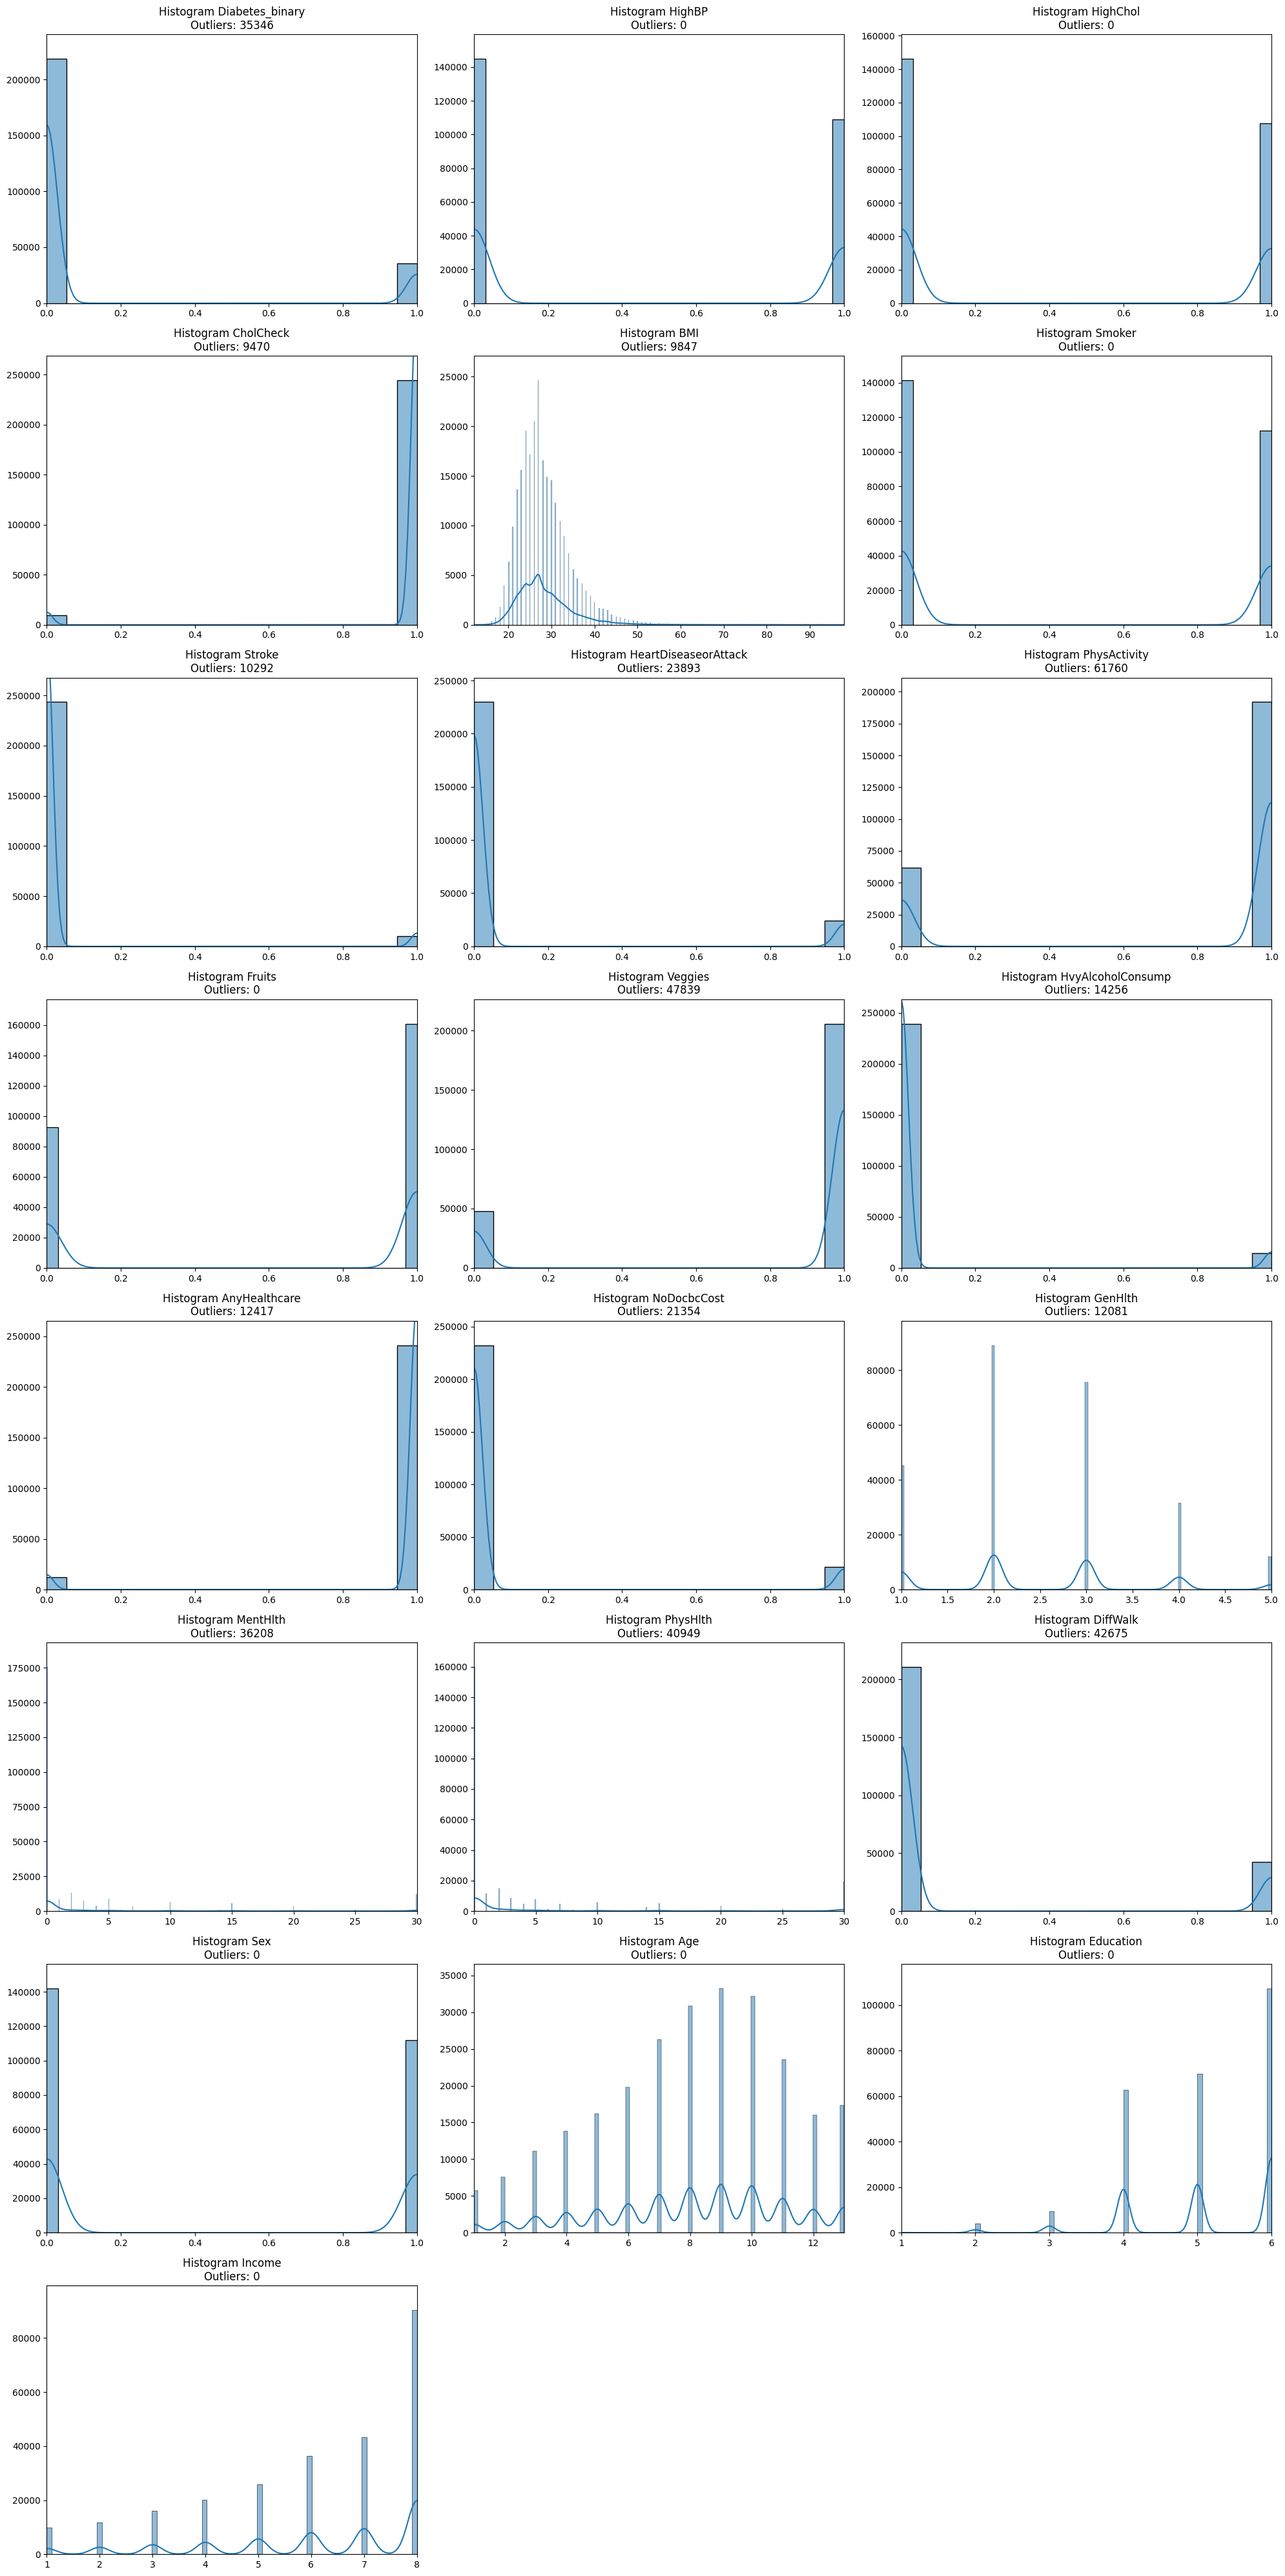

In [9]:
num_cols = 3
num_rows = int(np.ceil(len(df.columns) / num_cols))

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)

    sns.histplot(data=df, x=col, ax=axes[i], kde=True)
    axes[i].set_title(f"Histogram {col}\nOutliers: {outlier_count}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].set_xlim(df[col].min(), df[col].max())
    axes[i].set_ylim(0, df[col].value_counts().max() * 1.1)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig(os.path.join(plot_dir, "1.univariate_analysis_histogram.png"), dpi=300, bbox_inches="tight")
plt.show()


Penjelasan:
- Dataset memiliki 22 fitur, sebagian besar bertipe biner (0/1) dan beberapa bersifat kontinu atau ordinal.
- Fitur `Diabetes_binary` sebagai target menunjukkan ketidakseimbangan kelas yang signifikan, di mana hanya sekitar 13.9% sampel adalah penderita diabetes (label 1). Hal ini dapat menyebabkan bias model ke kelas mayoritas.
- Beberapa fitur seperti `HighBP`, `HighChol`, `Smoker`, `Fruits`, `Veggies`, dan `PhysActivity` menunjukkan distribusi yang berat sebelah (skewed), dengan dominasi pada salah satu kelas (biasanya 0).
- `BMI` merupakan fitur kontinu yang mengikuti distribusi mendekati normal, tetapi memiliki sejumlah besar outlier pada nilai ekstrem (di atas 60 hingga 98). Ini menunjukkan adanya individu dengan obesitas berat atau kesalahan pencatatan.
- Fitur `MentHlth` dan `PhysHlth` (jumlah hari mental/fisik tidak sehat) menunjukkan distribusi sangat miring ke kiri (skewed right), dengan mayoritas individu melaporkan 0 hari tidak sehat, namun terdapat outlier dengan nilai tinggi (hingga 30 hari).
- Beberapa fitur seperti `GenHlth`, `Education`, dan `Income` bersifat ordinal (berjenjang), ditunjukkan oleh distribusi batang vertikal yang terpisah. Distribusi nilai-nilainya cukup merata, meskipun ada dominasi pada kategori tengah atau atas.
- Fitur `DiffWalk` menunjukkan sebagian besar responden tidak mengalami kesulitan berjalan (nilai 0), dengan nilai 1 (mengalami kesulitan) sebagai minoritas dan terdeteksi sebagai outlier oleh metode IQR.
- Nilai outlier terdeteksi secara otomatis dengan pendekatan Interquartile Range (IQR), dan meskipun tidak selalu mencerminkan kesalahan data, jumlah yang besar dapat memengaruhi performa model jika tidak ditangani.
- Fitur `Age` dan `Sex` tidak menunjukkan outlier karena skalanya tetap dan terbatas, tetapi distribusinya bisa digunakan untuk melihat representasi demografis populasi.




## EDA : Bivariate Analysis


In [10]:
df_diabetes = df[df["Diabetes_binary"] == 1].copy()
df_no_diabetes = df[df["Diabetes_binary"] == 0].copy()

/tmp/ipykernel_1366/2796209950.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(data=df_no_diabetes, x="Sex", ax=ax1, palette="pastel")
/tmp/ipykernel_1366/2796209950.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(["Female", "Male"])
/tmp/ipykernel_1366/2796209950.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.countplot(data=df_diabetes, x="Sex", ax=ax2, palette="pastel")
/tmp/ipykernel_1366/2796209950.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(["Female", "M

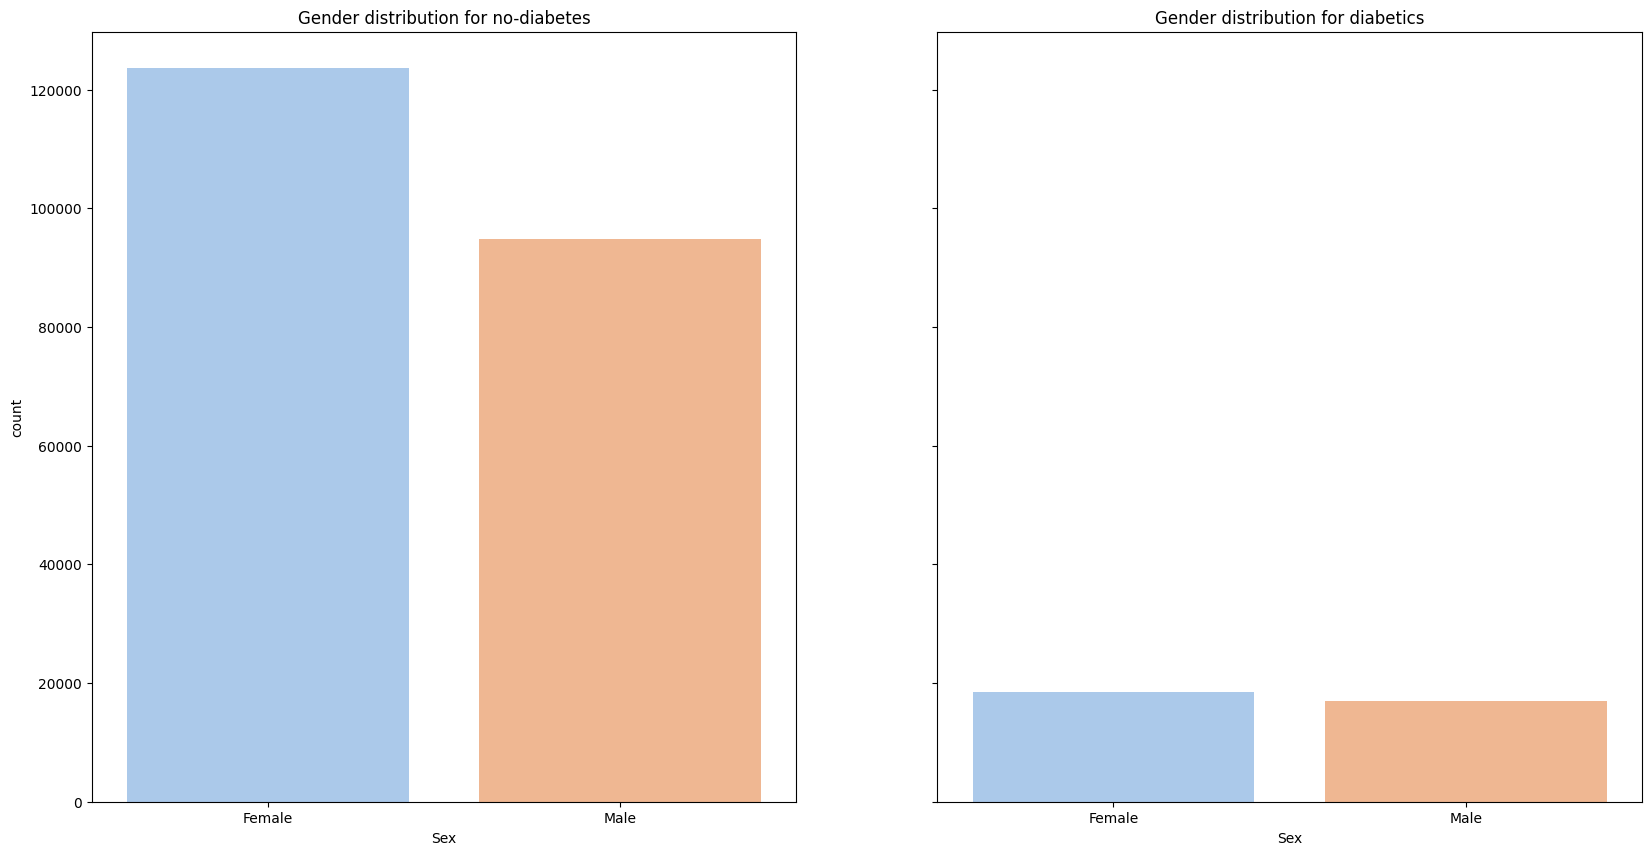

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20, 10))
ax1 = sns.countplot(data=df_no_diabetes, x="Sex", ax=ax1, palette="pastel")
ax1.set(title="Gender distribution for no-diabetes")
ax1.set_xticklabels(["Female", "Male"])

ax2 = sns.countplot(data=df_diabetes, x="Sex", ax=ax2, palette="pastel")
ax2.set(title="Gender distribution for diabetics")
ax2.set_xticklabels(["Female", "Male"])
plt.savefig(os.path.join(plot_dir, "2.bivariate_analysis_gender_diabetes_distribution.png"), dpi=300, bbox_inches="tight")
plt.show()


Penjelasan:
- Grafik menampilkan perbandingan jumlah pria dan wanita pada dua kelompok: penderita diabetes (`diabetics`) dan bukan penderita (`no-diabetes`).
- Pada kelompok **non-diabetes**, jumlah wanita sedikit lebih banyak dibandingkan pria, menunjukkan bahwa kelompok ini lebih banyak diisi oleh responden perempuan.
- Pada kelompok **diabetes**, distribusi pria dan wanita terlihat relatif seimbang, meskipun jumlah keseluruhan jauh lebih kecil dibandingkan kelompok non-diabetes (mencerminkan distribusi tidak seimbang label target).
- Kesimpulannya, **faktor gender tidak menunjukkan pengaruh besar terhadap kemungkinan terkena diabetes dalam data ini**, karena proporsi pria dan wanita hampir seimbang di kedua kategori.

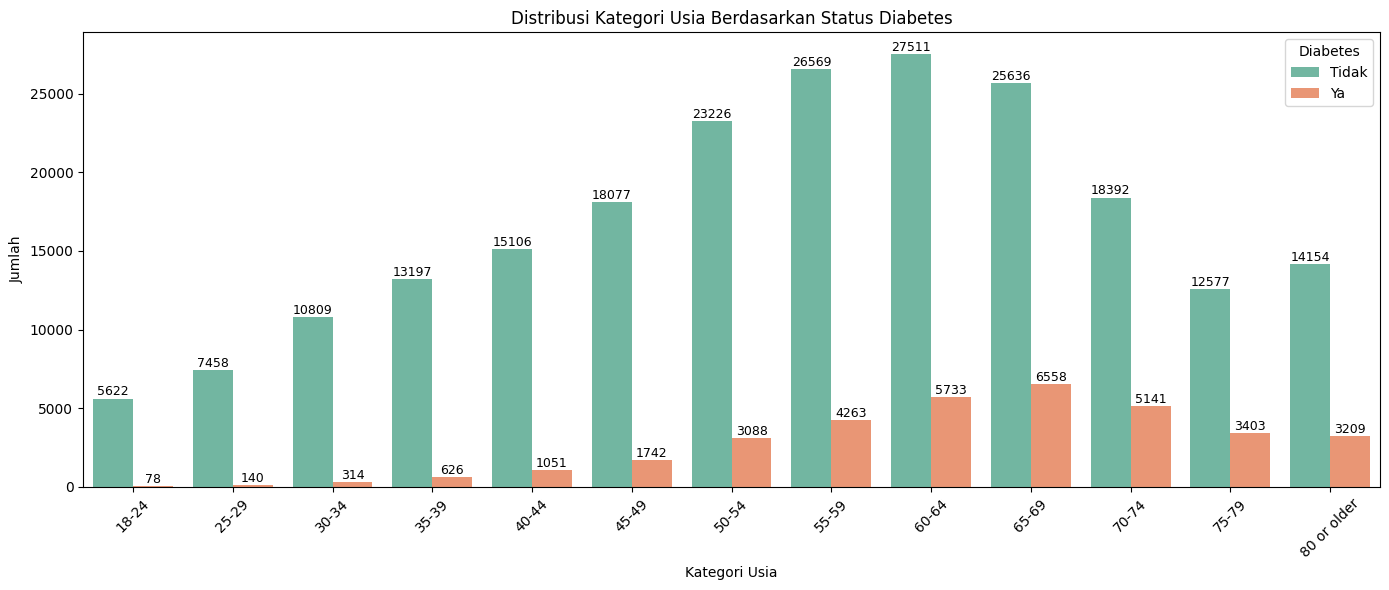

In [12]:
df_age = df[["Diabetes_binary", "Age"]].copy()

columnMappingValues = {
    "Age": {
        1: "18-24",
        2: "25-29",
        3: "30-34",
        4: "35-39",
        5: "40-44",
        6: "45-49",
        7: "50-54",
        8: "55-59",
        9: "60-64",
        10: "65-69",
        11: "70-74",
        12: "75-79",
        13: "80 or older",
    }
}

df_age["Age_Category"] = df_age["Age"].map(columnMappingValues["Age"])
fig, ax = plt.subplots(figsize=(14, 6))
sns.countplot(
    data=df_age,
    x="Age_Category",
    hue="Diabetes_binary",  # 1: diabetes, 0: tidak
    order=list(columnMappingValues["Age"].values()),
    palette="Set2",
    ax=ax,
)
ax.set_title("Distribusi Kategori Usia Berdasarkan Status Diabetes")
ax.set_xlabel("Kategori Usia")
ax.set_ylabel("Jumlah")
plt.xticks(rotation=45)
ax.legend(title="Diabetes", labels=["Tidak", "Ya"])

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + 1,
            int(height),
            ha="center",
            va="bottom",
            fontsize=9,
        )

plt.tight_layout()
plt.savefig(os.path.join(plot_dir, "3.bivariate_analysis_age_diabetes_distribution.png"), dpi=300, bbox_inches="tight")
plt.show()



Penjelasan:
- Grafik menunjukkan distribusi jumlah penderita dan non-penderita diabetes pada masing-masing kelompok usia, mulai dari 18–24 tahun hingga 80 tahun ke atas.
- Proporsi penderita diabetes (`label: Ya`) **meningkat seiring bertambahnya usia**, dengan puncaknya pada rentang **60–69 tahun**.
- Pada usia muda (18–39 tahun), jumlah penderita diabetes sangat rendah dibandingkan kelompok usia yang lebih tua, mencerminkan **risiko diabetes meningkat seiring bertambahnya usia**.
- Setelah usia 70 tahun, jumlah total populasi menurun, namun proporsi penderita diabetes tetap tinggi, mengindikasikan risiko yang tetap besar pada lansia.
- Kelompok usia 55–69 tahun memiliki jumlah kasus diabetes yang paling tinggi secara absolut, menunjukkan **usia paruh baya hingga lansia adalah kelompok paling rentan**.

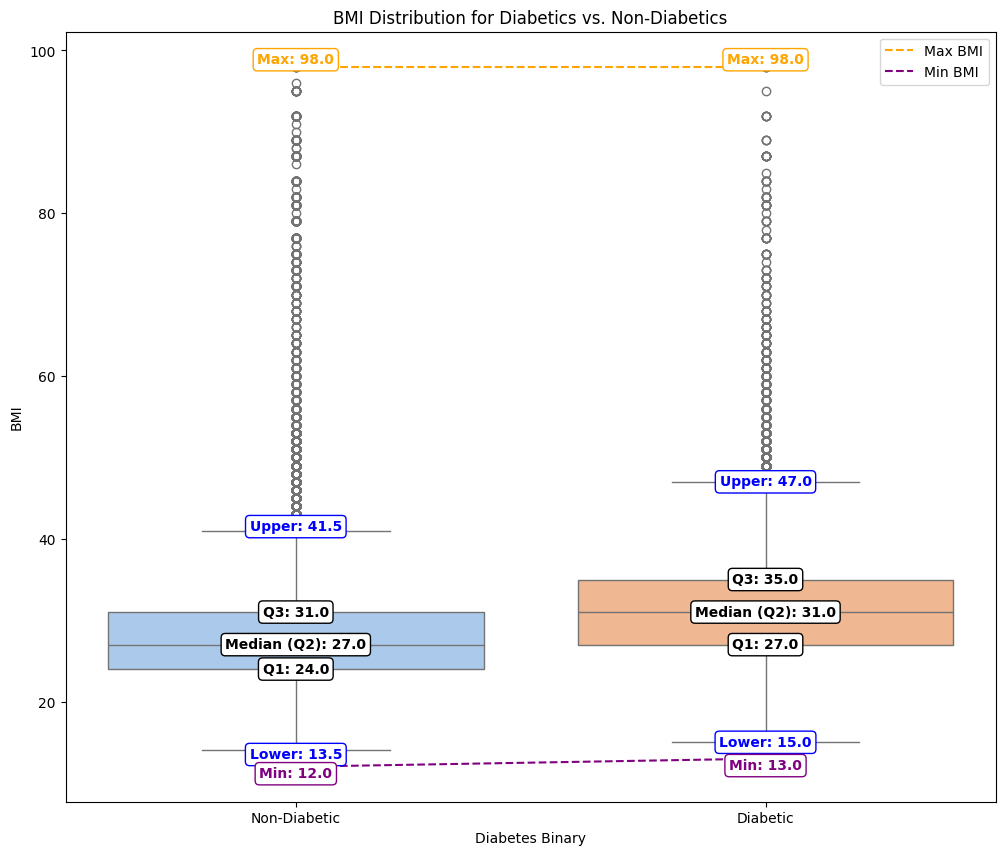

In [13]:
# BMI Distribution for people without diabetes vs. with diabetes
fig, ax = plt.subplots(figsize=(12, 10))

sns.boxplot(
    data=df,
    x="Diabetes_binary",
    y="BMI",
    hue="Diabetes_binary",
    palette="pastel",
    ax=ax,
    legend=False,
)

quartiles = df.groupby("Diabetes_binary")["BMI"].quantile([0.25, 0.5, 0.75]).unstack()
for xtick in quartiles.index:
    for q, label in zip([0.25, 0.5, 0.75], ["Q1", "Median (Q2)", "Q3"]):
        value = quartiles.loc[xtick, q]
        ax.text(
            xtick,
            value,
            f"{label}: {value:.1f}",
            ha="center",
            va="center",
            fontweight="bold",
            color="black",
            bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3"),
        )

for xtick in quartiles.index:
    Q1, Q3 = quartiles.loc[xtick, [0.25, 0.75]]
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    ax.text(
        xtick,
        lower_limit,
        f"Lower: {lower_limit:.1f}",
        ha="center",
        va="center",
        fontweight="bold",
        color="blue",
        bbox=dict(facecolor="white", edgecolor="blue", boxstyle="round,pad=0.3"),
    )
    ax.text(
        xtick,
        upper_limit,
        f"Upper: {upper_limit:.1f}",
        ha="center",
        va="center",
        fontweight="bold",
        color="blue",
        bbox=dict(facecolor="white", edgecolor="blue", boxstyle="round,pad=0.3"),
    )

max_bmi = df.groupby("Diabetes_binary")["BMI"].max()
min_bmi = df.groupby("Diabetes_binary")["BMI"].min()

if not max_bmi.empty and not min_bmi.empty:
    ax.plot(
        [0, 1],
        [max_bmi[0], max_bmi[1]],
        color="orange",
        linestyle="--",
        label="Max BMI",
    )
    ax.plot(
        [0, 1],
        [min_bmi[0], min_bmi[1]],
        color="purple",
        linestyle="--",
        label="Min BMI",
    )

    for xtick in max_bmi.index:
        ax.text(
            xtick,
            max_bmi[xtick],
            f"Max: {max_bmi[xtick]:.1f}",
            ha="center",
            va="bottom",
            fontweight="bold",
            color="orange",
            bbox=dict(facecolor="white", edgecolor="orange", boxstyle="round,pad=0.3"),
        )
        ax.text(
            xtick,
            min_bmi[xtick],
            f"Min: {min_bmi[xtick]:.1f}",
            ha="center",
            va="top",
            fontweight="bold",
            color="purple",
            bbox=dict(facecolor="white", edgecolor="purple", boxstyle="round,pad=0.3"),
        )

ax.set_title("BMI Distribution for Diabetics vs. Non-Diabetics")
ax.set_xlabel("Diabetes Binary")
ax.set_ylabel("BMI")
plt.xticks([0, 1], ["Non-Diabetic", "Diabetic"])
ax.legend()
plt.savefig(os.path.join(plot_dir, "4.bivariate_analysis_bmi_diabetes_distribution.png"), dpi=300, bbox_inches="tight")
plt.show()


Penjelasan:
- Grafik boxplot ini membandingkan distribusi nilai **BMI (Body Mass Index)** antara kelompok **non-diabetik** dan **diabetik**.
- Kelompok penderita diabetes memiliki **nilai median BMI sebesar 31.0**, lebih tinggi dibandingkan non-diabetik yang memiliki median **27.0**.
- Kuartil 1 (Q1) dan kuartil 3 (Q3) pada kelompok diabetik juga bergeser ke kanan (lebih tinggi), menunjukkan bahwa **sebaran nilai BMI penderita diabetes secara umum lebih besar**.
- Batas atas outlier (upper bound) kelompok diabetik mencapai **47.0**, dibandingkan **41.5** pada non-diabetik.
- Kedua kelompok memiliki nilai maksimum identik yaitu **98.0**, namun kelompok diabetik cenderung memiliki lebih banyak outlier ekstrem di atas Q3.
- Temuan ini menguatkan bahwa **tingginya BMI berkorelasi dengan peningkatan risiko diabetes**, menjadikan BMI sebagai salah satu fitur prediktif paling penting dalam modeling.

## EDA : Multivariate Analysis

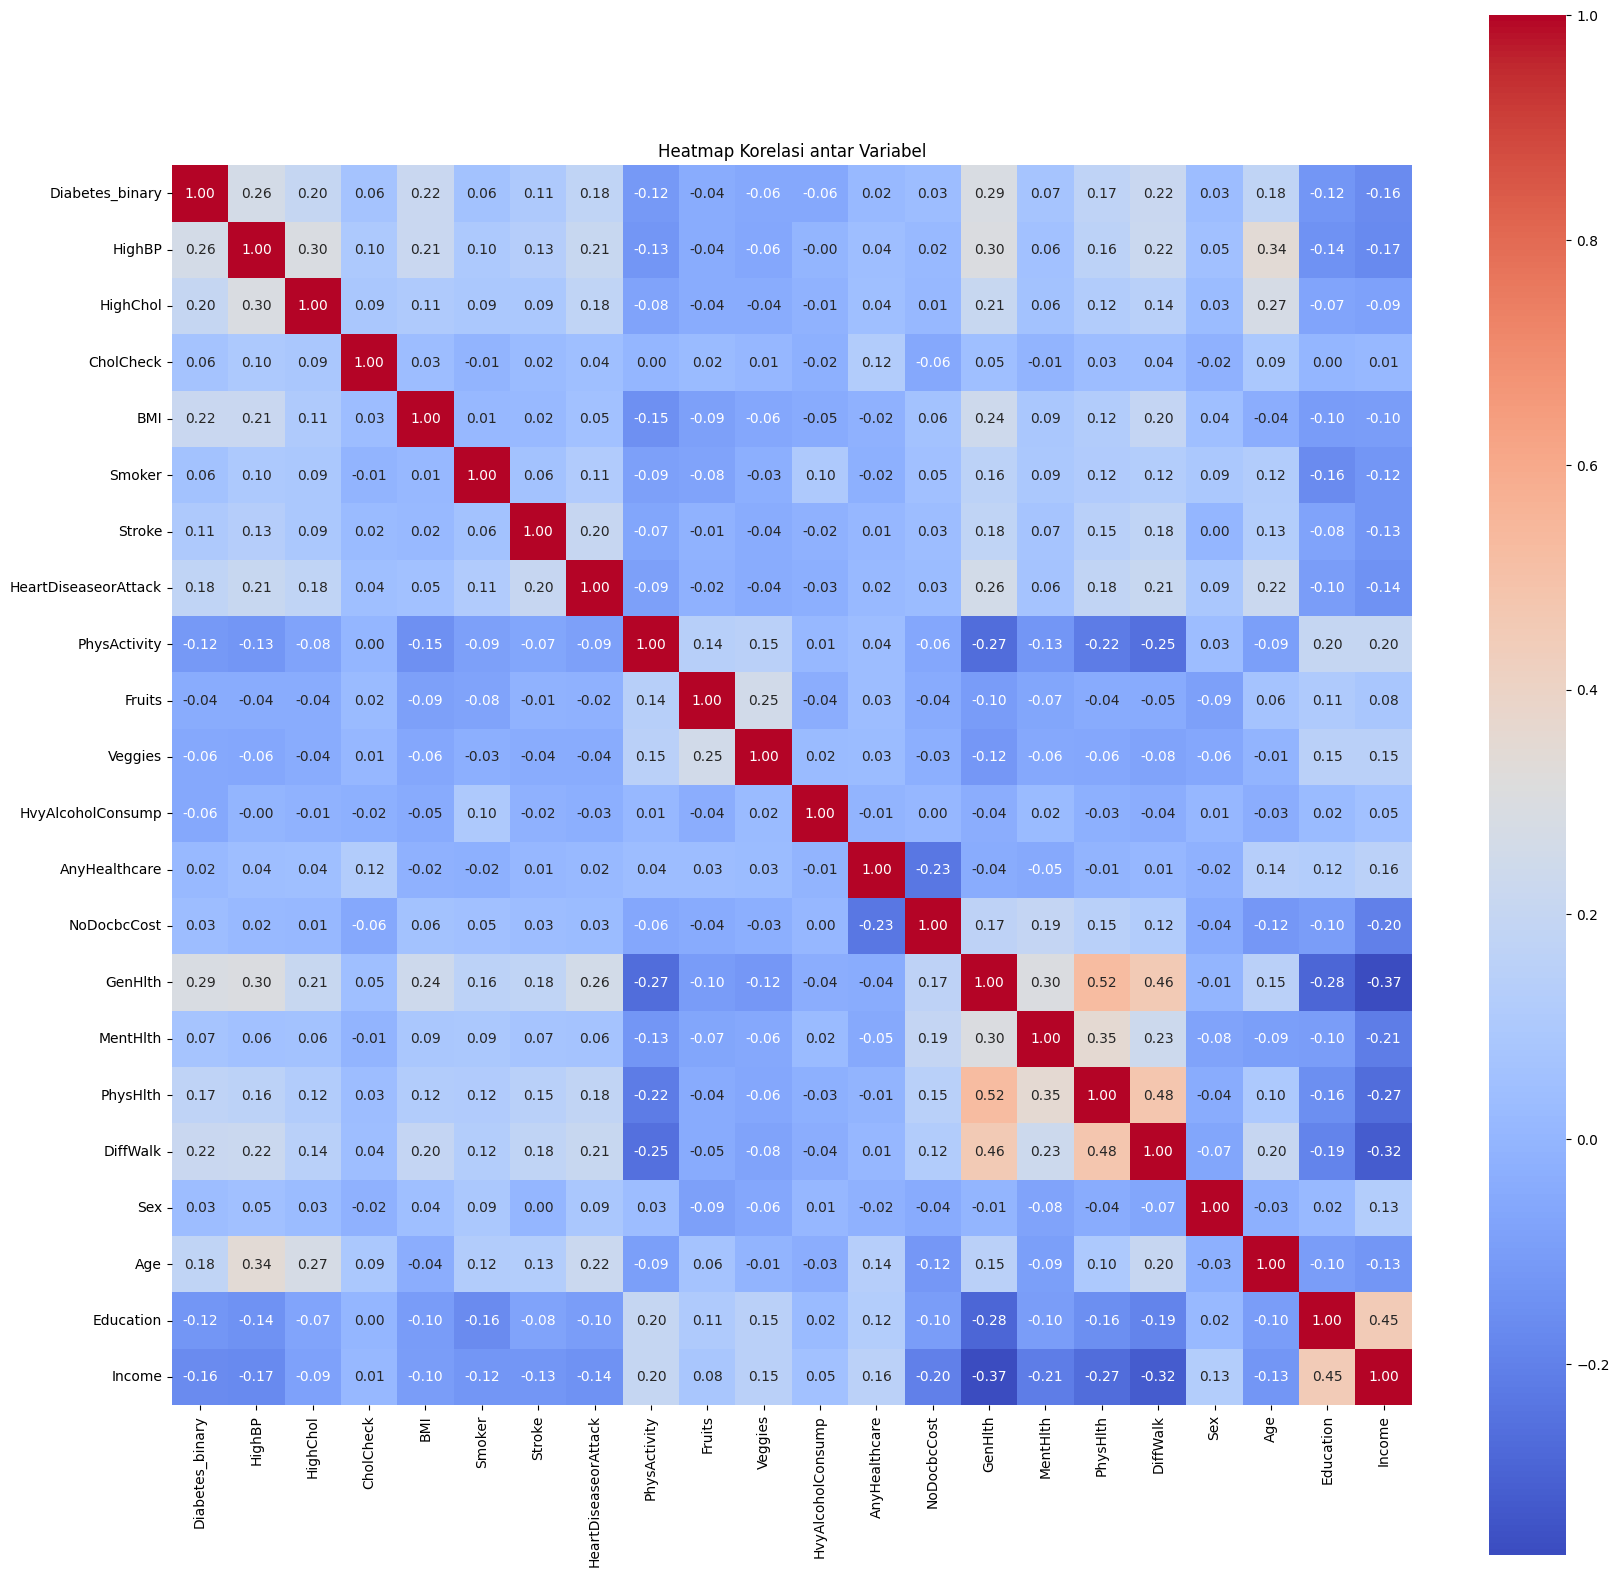

In [14]:
plt.figure(figsize=(20, 20))
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Heatmap Korelasi antar Variabel")
plt.savefig(os.path.join(plot_dir, "5.multivariate_analysis_correlation_heatmap.png"), dpi=300, bbox_inches="tight")
plt.show()


Penjelasan:
- Grafik di atas menunjukkan korelasi Pearson antara semua fitur numerik dalam dataset, termasuk target `Diabetes_binary`.
- Korelasi bernilai antara -1 hingga +1:
  - Nilai mendekati **+1** menunjukkan hubungan positif kuat.
  - Nilai mendekati **-1** menunjukkan hubungan negatif kuat.
  - Nilai **mendekati 0** menunjukkan hubungan lemah atau tidak ada korelasi linier.

Temuan Utama:
- Fitur yang memiliki korelasi **positif tertinggi dengan diabetes** adalah:
  - `HighBP` (**0.26**) → tekanan darah tinggi berhubungan kuat dengan diabetes.
  - `HighChol` (**0.20**) → kolesterol tinggi juga merupakan faktor risiko yang signifikan.
  - `BMI` (**0.22**) → indeks massa tubuh tinggi cenderung berasosiasi dengan diabetes.
  - `HeartDiseaseorAttack` (**0.21**) dan `DiffWalk` (**0.21**) → kondisi jantung dan kesulitan berjalan berhubungan dengan diabetes.

- Fitur dengan **korelasi negatif** terhadap diabetes:
  - `PhysActivity` (**-0.15**) → aktivitas fisik tinggi mungkin melindungi dari diabetes.
  - `Income` (**-0.16**) dan `Education` (**-0.14**) → indikasi bahwa status sosial ekonomi lebih rendah berpotensi terkait risiko diabetes lebih tinggi.

- Tidak ada fitur yang sangat berkorelasi tinggi satu sama lain (tidak ada multikolinearitas parah), sehingga sebagian besar fitur masih **layak digunakan dalam model**.

- Korelasi antar fitur lain yang perlu diperhatikan:
  - `MentHlth` dan `PhysHlth` memiliki korelasi cukup tinggi (**0.52**), menunjukkan hubungan antara kesehatan mental dan fisik.
  - `Age` berkorelasi cukup signifikan dengan `HighBP`, `HeartDisease`, dan `DiffWalk`, memperkuat hipotesis bahwa usia adalah faktor risiko penting dalam kesehatan.


# Mengatasi Missing Value

In [15]:
df.shape

(253680, 22)

In [16]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

if missing_values.empty:
	print("No missing values found in the dataset.")
else:
	print(missing_values)

No missing values found in the dataset.


- Dilakukan pemeriksaan nilai kosong (missing value) pada seluruh kolom dalam dataset.
- Hasilnya menunjukkan bahwa **tidak terdapat missing value sama sekali** pada dataset ini (`0` pada semua kolom).
- Oleh karena itu, **tidak diperlukan proses imputasi atau pembersihan data terkait nilai kosong** pada tahap ini.

# Menghapus Data Duplikat

In [17]:
# Delete Duplicate Rows
df.duplicated().sum()

24206

Penjelasan:
- Dilakukan pemeriksaan terhadap baris yang memiliki data duplikat secara keseluruhan.
- Hasilnya menunjukkan terdapat **24.206 baris duplikat** dari total 253.680 baris data.
- Keberadaan data duplikat dapat menyebabkan **bias dalam pelatihan model**, terutama jika duplikasi terjadi secara tidak seimbang antara kelas mayoritas dan minoritas.
- Oleh karena itu, semua baris duplikat akan dihapus untuk memastikan keunikan data yang akan digunakan dalam proses modeling.

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.shape

(229474, 22)

# Mengatasi Outlier

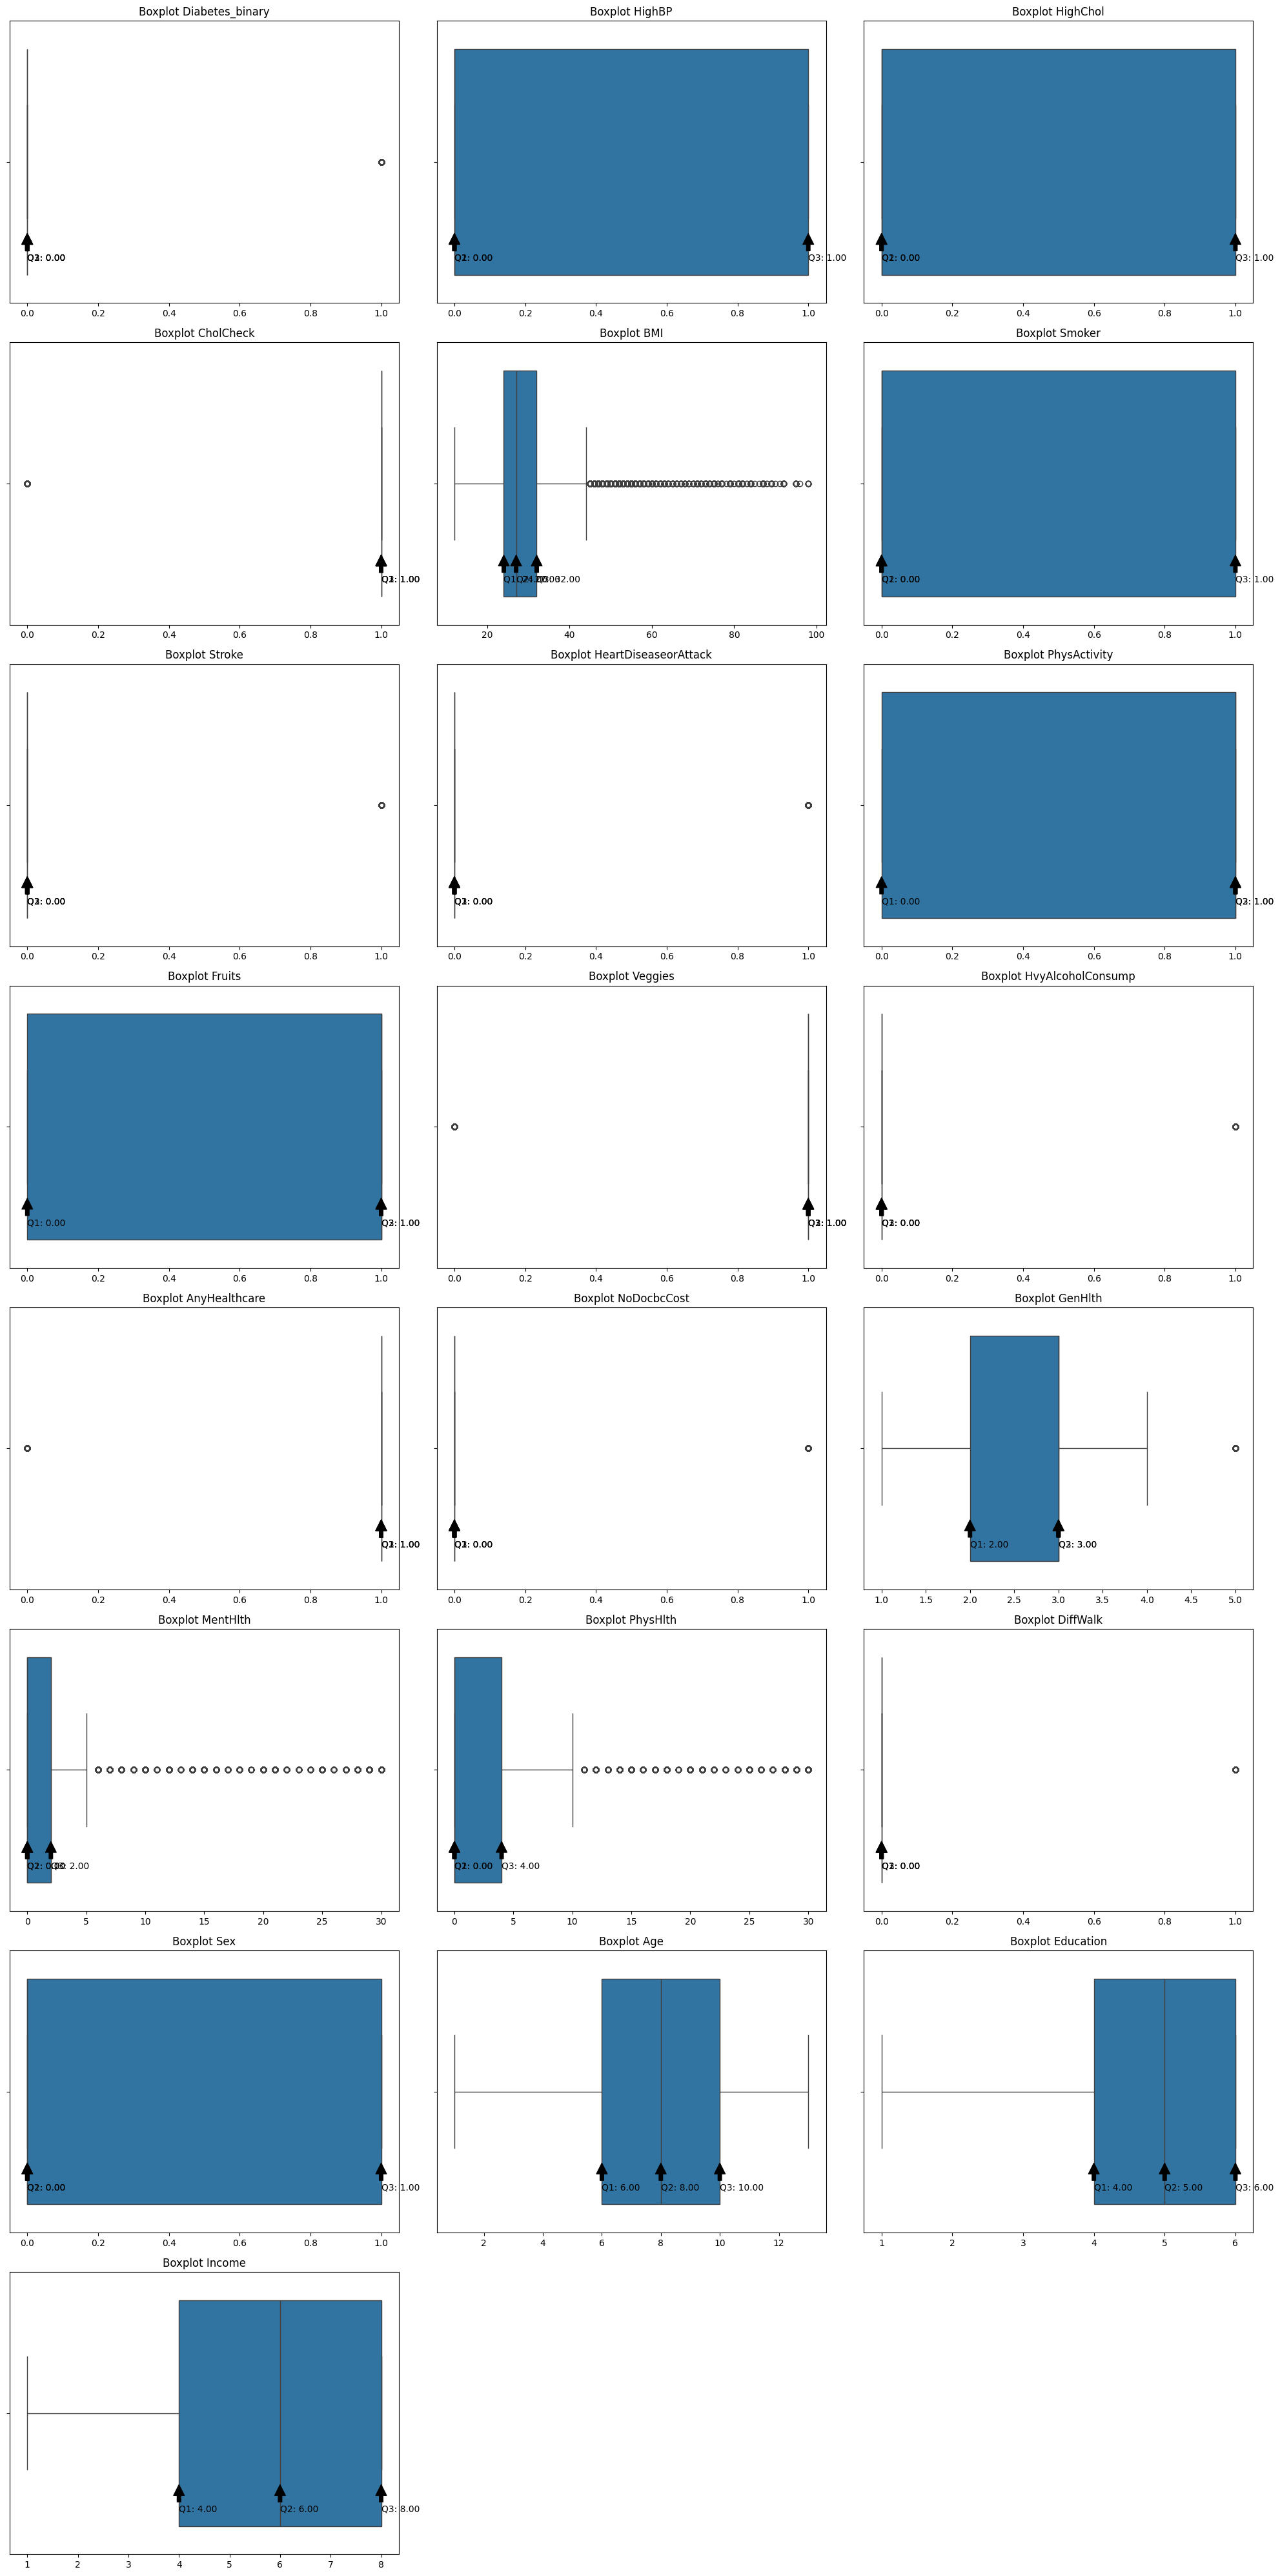


Outliers pada fitur 'Diabetes_binary' (35097 data):

Outliers pada fitur 'HighBP' (0 data):

Outliers pada fitur 'HighChol' (0 data):

Outliers pada fitur 'CholCheck' (9298 data):

Outliers pada fitur 'BMI' (5638 data):

Outliers pada fitur 'Smoker' (0 data):

Outliers pada fitur 'Stroke' (10284 data):

Outliers pada fitur 'HeartDiseaseorAttack' (23713 data):

Outliers pada fitur 'PhysActivity' (0 data):

Outliers pada fitur 'Fruits' (0 data):

Outliers pada fitur 'Veggies' (47137 data):

Outliers pada fitur 'HvyAlcoholConsump' (13950 data):

Outliers pada fitur 'AnyHealthcare' (12389 data):

Outliers pada fitur 'NoDocbcCost' (21323 data):

Outliers pada fitur 'GenHlth' (12078 data):

Outliers pada fitur 'MentHlth' (36162 data):

Outliers pada fitur 'PhysHlth' (34346 data):

Outliers pada fitur 'DiffWalk' (42625 data):

Outliers pada fitur 'Sex' (0 data):

Outliers pada fitur 'Age' (0 data):

Outliers pada fitur 'Education' (0 data):

Outliers pada fitur 'Income' (0 data):


In [20]:
num_cols = 3
num_rows = (len(df.columns) + num_cols - 1) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()
outlier_dict = {}

for i, col in enumerate(df.columns):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f"Boxplot {col}")
    axes[i].set_xlabel("")

    Q1 = df[col].quantile(0.25)
    Q2 = df[col].quantile(0.50)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_dict[col] = outliers[col]

    axes[i].annotate(
        f"Q1: {Q1:.2f}",
        xy=(Q1, 0.25),
        xytext=(Q1, 0.35),
        arrowprops=dict(facecolor="black", shrink=0.05),
    )
    axes[i].annotate(
        f"Q2: {Q2:.2f}",
        xy=(Q2, 0.25),
        xytext=(Q2, 0.35),
        arrowprops=dict(facecolor="black", shrink=0.05),
    )
    axes[i].annotate(
        f"Q3: {Q3:.2f}",
        xy=(Q3, 0.25),
        xytext=(Q3, 0.35),
        arrowprops=dict(facecolor="black", shrink=0.05),
    )


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig(os.path.join(plot_dir, "6.Outlier_analysis_boxplot.png"), dpi=300, bbox_inches="tight")
plt.show()


for col, outliers in outlier_dict.items():
    print(f"\nOutliers pada fitur '{col}' ({len(outliers)} data):")

Penjelasan:
- Boxplot dan perhitungan IQR menunjukkan bahwa beberapa fitur dalam dataset memiliki **jumlah outlier yang sangat signifikan**, khususnya pada fitur-fitur numerik kontinu dan ordinal.
- Fitur-fitur seperti **MentHlth (36.162 outlier)**, **PhysHlth (34.346)**, **DiffWalk (42.625)**, dan **BMI (9.047)** menampilkan distribusi yang sangat condong ke nilai rendah, tetapi dengan nilai maksimum yang jauh lebih tinggi dari Q3, menciptakan outlier ekstrem di bagian atas.
- Fitur seperti **GenHlth**, **HeartDiseaseorAttack**, **Veggies**, **HvyAlcoholConsump**, dan **NoDocbcCost** juga menunjukkan outlier dalam jumlah puluhan ribu, yang bisa mendistorsi pola pembelajaran model jika tidak ditangani dengan tepat.
- Sementara itu, fitur kategorikal seperti **Age**, **Sex**, **Education**, dan **Income** tidak menunjukkan outlier secara statistik karena skala nilainya terbatas dan terdistribusi merata.
- Outlier yang tidak ditangani dapat menyebabkan model menjadi bias terhadap nilai ekstrem, memperburuk generalisasi, dan mengganggu performa terutama pada model-model berbasis jarak atau linier.
- Oleh karena itu, langkah penanganan khusus terhadap outlier akan dilakukan dengan pendekatan deteksi anomali berbasis model, yaitu menggunakan *Isolation Forest*, pada tahap berikutnya untuk membersihkan data tanpa menghilangkan pola yang valid secara statistik.


In [21]:
X = df.drop(columns=["Diabetes_binary"])
y = df["Diabetes_binary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Interpretasi:
- Data dipisahkan menjadi fitur (X) dan target (y).
- Lalu dibagi menjadi 80% data latih (X_train, y_train) dan 20% data uji (X_test, y_test) dengan random_state=42 agar hasilnya konsisten.
- Ini penting agar deteksi outlier hanya dilakukan pada data latih saja, menghindari kebocoran informasi dari data uji.



In [22]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((183579, 21), (183579,), (45895, 21), (45895,))

Interpretasi:
- Jumlah fitur = 21 kolom.
- 183.579 sampel pada data latih dan 45.895 sampel pada data uji.
- Ukuran ini sudah memperhitungkan penghapusan duplikat sebelumnya.



In [23]:
IF = IsolationForest(contamination=0.075, random_state=42)

outlier_labels = IF.fit_predict(X_train)

n_outliers = np.sum(outlier_labels == -1)
print(f"Jumlah outlier yang terdeteksi: {n_outliers}")
print(f"Jumlah data yang tidak terdeteksi sebagai outlier: {len(X_train) - n_outliers}")


Jumlah outlier yang terdeteksi: 13769
Jumlah data yang tidak terdeteksi sebagai outlier: 169810


Interpretasi:
- Menggunakan Isolation Forest untuk mendeteksi outlier pada data latih.
- Parameter contamination=0.075 berarti diasumsikan sekitar 7.5% data adalah outlier.
- Ditemukan 13.769 sampel dianggap outlier dari 183.579 data latih.
- Outlier ini akan dibuang agar model hanya belajar dari pola data "normal".

In [24]:
X_train_clean = X_train[outlier_labels != -1]
y_train_clean = y_train[outlier_labels != -1]

Interpretasi:
- Hanya menyimpan baris data latih yang tidak ditandai sebagai outlier (label != -1).
- Dihasilkan X_train_clean dan y_train_clean sebagai versi data latih yang telah dibersihkan.
- Data ini akan digunakan untuk pelatihan model selanjutnya.

Penjelasan:
- Setelah dilakukan analisis visual dan statistik berbasis IQR, diketahui bahwa beberapa fitur memiliki distribusi nilai ekstrem (outlier) dalam jumlah besar yang berpotensi mengganggu proses pelatihan model.
- Untuk menangani hal ini, digunakan metode berbasis deteksi anomali otomatis, yaitu **Isolation Forest**, dengan parameter `contamination=0.075` yang mengasumsikan sekitar 7.5% data adalah outlier.
- Proses ini **hanya diterapkan pada data latih (X_train)**, dan **bukan pada data uji (X_test)**.

Alasan:
- Tujuan utama pembersihan outlier adalah agar model **belajar dari data yang bersih dan representatif** selama proses pelatihan.
- Data uji merepresentasikan **kondisi dunia nyata yang tidak terkontrol**, sehingga harus tetap mengandung kemungkinan adanya outlier, untuk mengevaluasi seberapa robust model terhadap data ekstrem.
- Jika kita membersihkan outlier dari data uji, maka hasil evaluasi bisa menjadi **tidak realistis dan terlalu optimistis**, karena model diuji hanya pada data yang "ideal".
- Oleh karena itu, **hanya data latih yang dihapus outlier-nya**, sedangkan data uji tetap utuh untuk menjaga validitas pengujian performa model.

Hasil:
- Dari 183.579 data latih, sebanyak **13.769 data terdeteksi sebagai outlier** dan dihapus.
- Dataset latih akhir (`X_train_clean`) berisi **169.810 data bersih**, yang akan digunakan untuk proses pelatihan model selanjutnya.

# Normalisasi Fitur

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clean)
X_test_scaled = scaler.transform(X_test)

df_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_clean.columns)

display(df_train_scaled.sample(5).T)


,125152,137297,7296,123089,29523
HighBP,1.131764,-0.883576,-0.883576,-0.883576,1.131764
HighChol,-0.865602,-0.865602,-0.865602,-0.865602,1.155266
CholCheck,0.192110,0.192110,0.192110,0.192110,0.192110
BMI,-0.228893,-0.846685,-1.001133,-0.383341,-0.537789
Smoker,1.101781,-0.907621,-0.907621,-0.907621,-0.907621
Stroke,6.173225,-0.161990,-0.161990,-0.161990,-0.161990
HeartDiseaseorAttack,3.447305,-0.290082,-0.290082,-0.290082,-0.290082
PhysActivity,0.563971,-1.773142,-1.773142,0.563971,0.563971
Fruits,0.771867,0.771867,-1.295560,0.771867,0.771867
Veggies,0.479127,0.479127,-2.087129,0.479127,0.479127


Penjelasan:
- Setelah data latih dibersihkan dari outlier, dilakukan proses normalisasi fitur menggunakan **StandardScaler** dari Scikit-learn.
- StandardScaler bekerja dengan cara mengubah setiap fitur menjadi skala distribusi standar dengan **mean = 0** dan **standar deviasi = 1**.
- Proses ini penting terutama untuk algoritma yang sensitif terhadap skala fitur seperti K-Nearest Neighbors, Logistic Regression, dan SVM.
- **Scaler hanya di-fit pada data latih bersih**, dan hasil transformasi yang sama kemudian diterapkan ke data uji.
- Hal ini bertujuan untuk **menghindari kebocoran data uji ke dalam proses pelatihan**, yang bisa menyebabkan hasil evaluasi model menjadi bias.
- Data latih akhir memiliki ukuran `(169810, 21)` dan data uji `(45895, 21)` — semua fitur telah berada pada skala yang seragam dan siap untuk proses modeling selanjutnya.


In [26]:
print(
    y_train_clean[y_train_clean == 1].shape[0],
    y_train_clean[y_train_clean == 0].shape[0],
)

23646 146164


Penjelasan:
- Sebelum menerapkan SMOTE, jumlah label target pada data latih bersih adalah 169.810, dengan rincian:
    - **Penderita diabetes (label 1)**: 23.646 (13.92%)
    - **Non-diabetik (label 0)**: 146.164 (86.08%)

In [27]:
smote = SMOTE(random_state=42)
X_train_final, y_train_final = smote.fit_resample(X_train_scaled, y_train_clean)

Penjelasan:
- Dataset ini memiliki distribusi kelas target yang **tidak seimbang**, di mana jumlah kasus non-diabetes jauh lebih banyak daripada kasus diabetes.
- Ketidakseimbangan ini dapat menyebabkan model **berpihak pada kelas mayoritas**, sehingga sensitivitas terhadap kelas minoritas (diabetes) menjadi rendah.
- Untuk mengatasi hal ini digunakan teknik **SMOTE (Synthetic Minority Over-sampling Technique)**, yaitu metode yang menciptakan data sintetis baru pada kelas minoritas untuk menyeimbangkan distribusi.
- SMOTE hanya diterapkan pada data latih yang telah dibersihkan dan diskalakan (`X_train_scaled`, `y_train_clean`), untuk menjaga integritas data uji.
- Setelah SMOTE, distribusi kelas menjadi **seimbang**, memungkinkan model untuk belajar secara adil dari kedua kelas.


In [28]:
print(y_train_final[y_train_final == 1].shape[0], y_train_final[y_train_final == 0].shape[0])

146164 146164


Penjelasan:
- Setelah menerapkan SMOTE, distribusi kelas target pada data latih menjadi seimbang, dengan masing-masing kelas memiliki **146.164 sampel**.
- Data latih yang telah dioversampling ini akan digunakan untuk pelatihan model selanjutnya.

In [29]:
print(X_train_final.shape, y_train_final.shape, X_test_scaled.shape, y_test.shape)

(292328, 21) (292328,) (45895, 21) (45895,)


# Pembangunan Model Klasifikasi

In [30]:
models = {
    "Logistic_Regression": LogisticRegression(C=1, solver="liblinear", max_iter=200),
    "K-Nearest_Neighbour": KNeighborsClassifier(
        n_neighbors=10, weights="distance", algorithm="auto"
    ),
    "XGBoost": XGBClassifier(eval_metric="mlogloss"),
}

Penjelasan:
- Untuk mengevaluasi performa berbagai algoritma klasifikasi, didefinisikan 3 model yang akan dibandingkan:
  
1. **Logistic Regression**  
   - Merupakan model dasar yang digunakan untuk klasifikasi biner.
   - Parameter `C=1` mengatur regularisasi (semakin kecil nilainya, semakin kuat regulasinya).
   - Solver `liblinear` cocok untuk dataset kecil-menengah dan masalah klasifikasi biner.
   - `max_iter=200` memastikan konvergensi model saat training.

2. **K-Nearest Neighbour (KNN)**  
   - Merupakan model berbasis instance (lazy learner) yang memprediksi label berdasarkan tetangga terdekat.
   - `n_neighbors=10` artinya prediksi akan didasarkan pada 10 tetangga terdekat.
   - `weights="distance"` memberi bobot lebih besar pada tetangga yang lebih dekat.
   - `algorithm="auto"` membuat sklearn otomatis memilih algoritma pencarian tetangga terbaik (brute force, KDTree, atau BallTree).

3. **XGBoost (Extreme Gradient Boosting)**  
   - Algoritma boosting yang kuat dan populer untuk berbagai kompetisi klasifikasi.
   - `eval_metric="mlogloss"` digunakan untuk menghitung fungsi kerugian log-loss saat pelatihan model.
   - Model ini secara default bekerja sangat baik pada data tabular dan dapat menangani fitur yang tidak terlalu terstandarisasi.

- Ketiga model ini akan dilatih dan dievaluasi menggunakan data yang telah melalui proses pembersihan outlier, scaling, dan balancing, sehingga hasil evaluasinya bisa lebih adil dan representatif.

# Training dan Evaluasi Model

🔍 Model: Logistic_Regression
Test Accuracy     : 0.7049
Test F1 Score     : 0.7445


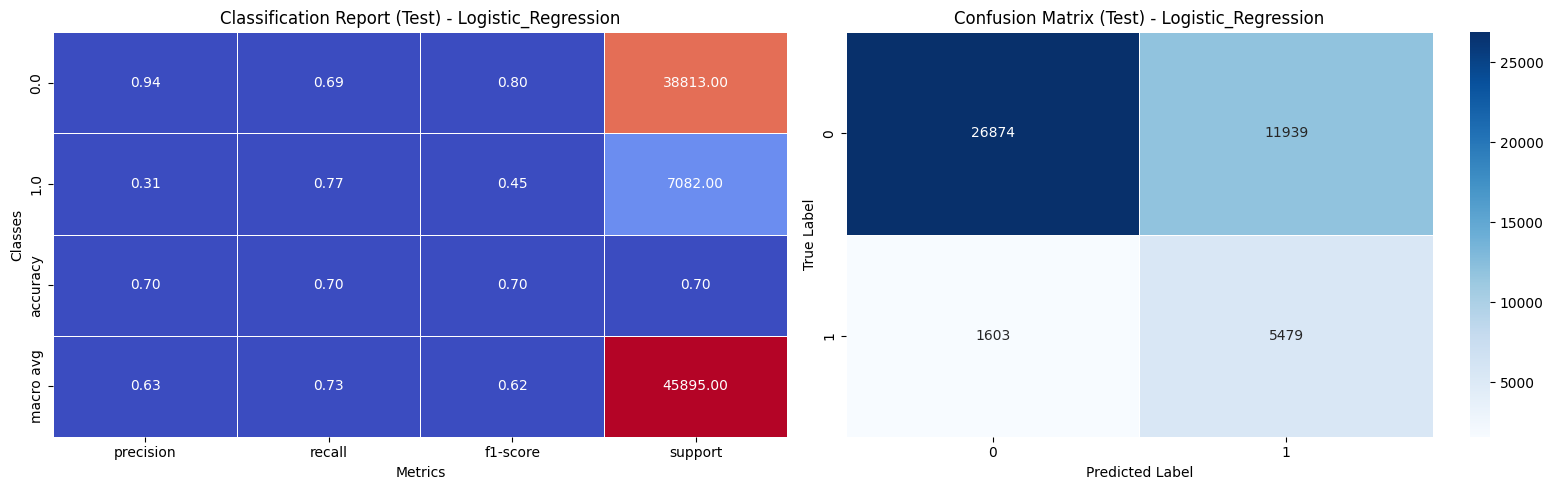

🔍 Model: K-Nearest_Neighbour
Test Accuracy     : 0.6781
Test F1 Score     : 0.7207


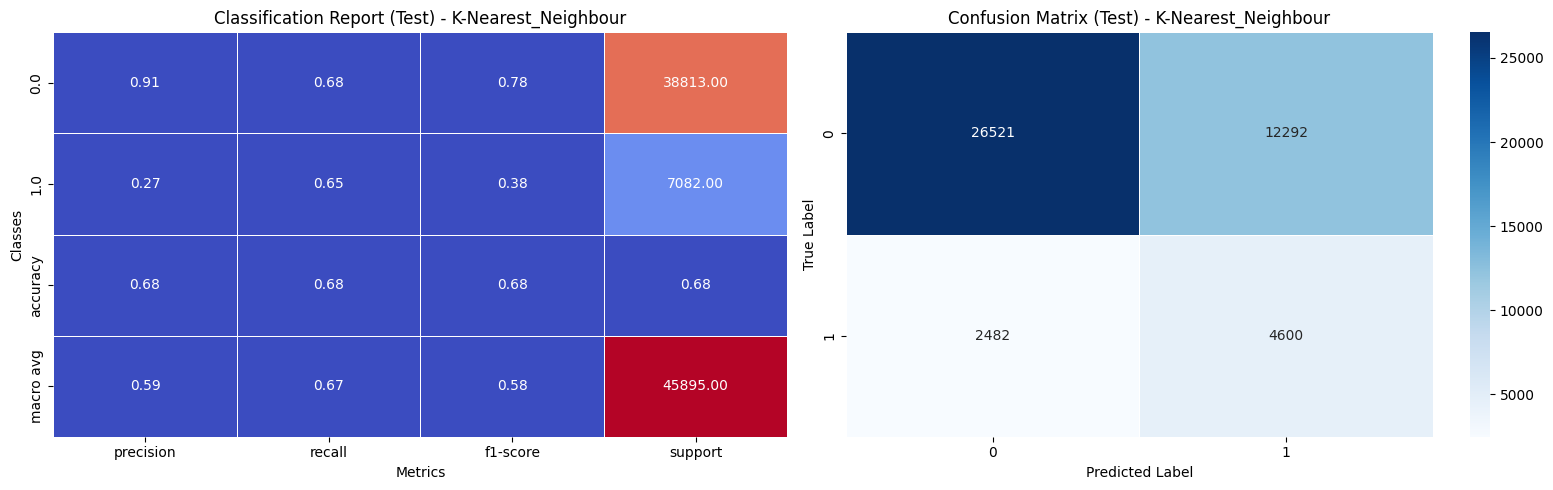

🔍 Model: XGBoost
Test Accuracy     : 0.8492
Test F1 Score     : 0.8187


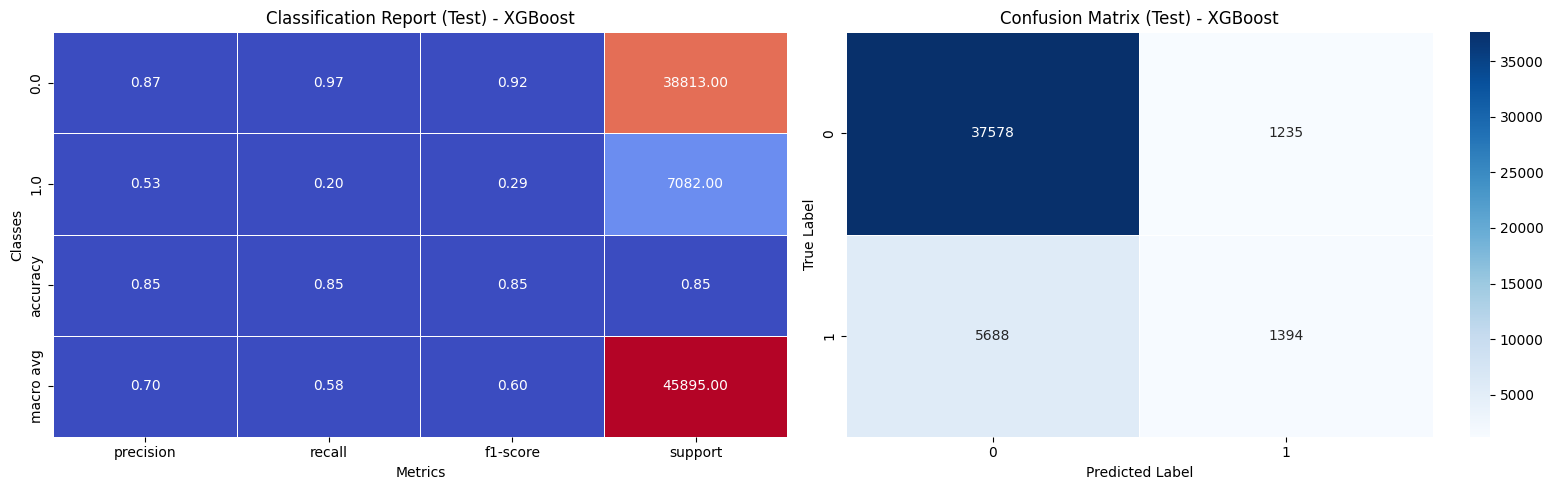

In [31]:
results = {}

for model_name, model in models.items():
    model.fit(X_train_final, y_train_final)

    y_test_pred = model.predict(X_test_scaled)

    results[model_name] = {
        "test_accuracy": accuracy_score(y_test, y_test_pred),
        "test_f1": f1_score(y_test, y_test_pred, average="weighted"),
        "classification_report_test": classification_report(
            y_test, y_test_pred, output_dict=True
        ),
        "confusion_matrix_test": confusion_matrix(y_test, y_test_pred),
    }

    # ==== Cetak metrik ====
    print(f"🔍 Model: {model_name}")
    print(f"Test Accuracy     : {results[model_name]['test_accuracy']:.4f}")
    print(f"Test F1 Score     : {results[model_name]['test_f1']:.4f}")
    print("=" * 40)

    # ==== Buat plot ====
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))

    # === Heatmap Classification Report (Test) ===
    cr_test_df = pd.DataFrame(results[model_name]["classification_report_test"]).T
    cr_test_df = cr_test_df.iloc[:-1, :] 
    sns.heatmap(
        cr_test_df,
        annot=True,
        fmt=".2f",
        cmap="coolwarm",
        linewidths=0.5,
        ax=axes[0],
        cbar=False,
    )
    axes[0].set_title(f"Classification Report (Test) - {model_name}", fontsize=12)
    axes[0].set_ylabel("Classes", fontsize=10)
    axes[0].set_xlabel("Metrics", fontsize=10)

    # === Heatmap Confusion Matrix (Test) ===
    cm_test = results[model_name]["confusion_matrix_test"]
    sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", linewidths=0.5, ax=axes[1])
    axes[1].set_title(f"Confusion Matrix (Test) - {model_name}", fontsize=12)
    axes[1].set_xlabel("Predicted Label", fontsize=10)
    axes[1].set_ylabel("True Label", fontsize=10)

    plt.tight_layout()
    plt.savefig(
        os.path.join(plot_dir, f"7.{model_name}_classification_report_confusion_matrix.png"),
        dpi=300,
        bbox_inches="tight",
    )
    plt.show()

## 📊 Evaluasi dan Perbandingan Model

### 🔍 Metode Evaluasi
Ketiga model dievaluasi menggunakan data uji (`X_test_scaled`, `y_test`) berdasarkan metrik:
- **Accuracy**: persentase prediksi benar dari seluruh data.
- **F1 Score (weighted)**: harmonic mean antara precision dan recall dengan bobot dari masing-masing kelas.
- **Classification Report**: precision, recall, dan f1-score per kelas.
- **Confusion Matrix**: jumlah prediksi benar dan salah untuk masing-masing kelas.

---

### 1. 🚀 Logistic Regression
- **Accuracy**: 0.7049
- **F1 Score**: 0.7445
- **Precision kelas 0 (non-diabetes)**: 0.94
- **Recall kelas 1 (diabetes)**: 0.77
- **Precision kelas 1 (diabetes)**: 0.31 → banyak false positive
- **F1-score macro average**: 0.62

Confusion Matrix:
- 11.939 kasus non-diabetes salah diprediksi sebagai diabetes.
- 1.603 kasus diabetes tidak terdeteksi (false negative).

---

### 2. 🔍 K-Nearest Neighbour (KNN)
- **Accuracy**: 0.6781
- **F1 Score**: 0.7207
- **Precision kelas 0**: 0.91
- **Precision kelas 1**: 0.27
- **Recall kelas 1**: 0.65
- **F1-score macro average**: 0.58

Confusion Matrix:
- 12.292 prediksi salah untuk non-diabetes.
- 2.482 kasus diabetes tidak terdeteksi.

---

### 3. 🌟 XGBoost
- **Accuracy**: 0.8492 ✅
- **F1 Score**: 0.8187 ✅
- **Precision kelas 0**: 0.87
- **Precision kelas 1**: 0.53 (tertinggi di antara semua model)
- **Recall kelas 1**: 0.20 (masih rendah tapi bisa ditingkatkan lewat tuning)
- **F1-score macro average**: 0.60

Confusion Matrix:
- Hanya 1.235 kasus non-diabetes salah diprediksi.
- 5.688 kasus diabetes tidak terdeteksi (false negative).

---

### ✅ Kesimpulan

| Model                 | Accuracy | F1 Score | Catatan Penting                         |
|----------------------|----------|----------|------------------------------------------|
| Logistic Regression  | 0.7049   | 0.7445   | Recall bagus tapi precision kelas 1 rendah |
| K-Nearest Neighbour  | 0.6781   | 0.7207   | Performa cenderung seimbang tapi lebih lemah |
| **XGBoost** ✅        | **0.8492** | **0.8187** | **Terbaik di semua metrik utama**        |

> 🔎 **XGBoost adalah model terbaik pada eksperimen ini**, dengan akurasi dan F1 score tertinggi serta performa paling stabil dalam membedakan kelas.



# Hyperparameter Tuning Model Terbaik (XGBoost)

In [32]:
def xgb_cv(n_estimators, max_depth, learning_rate, subsample, colsample_bytree):
    model = XGBClassifier(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        eval_metric="logloss",
        random_state=42,
    )

    scores = cross_val_score(
        model, X_train_final, y_train_final, cv=3, scoring="f1_weighted"
    )
    return scores.mean()


pbounds = {
    "n_estimators": (100, 300),
    "max_depth": (3, 10),
    "learning_rate": (0.01, 0.2),
    "subsample": (0.6, 1.0),
    "colsample_bytree": (0.6, 1.0),
}

optimizer = BayesianOptimization(f=xgb_cv, pbounds=pbounds, random_state=42)

optimizer.maximize(init_points=5, n_iter=25)


|   iter    |  target   | colsam... | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------
| 1         | 0.8929    | 0.7498    | 0.1906    | 8.124     | 219.7     | 0.6624    |
| 2         | 0.8784    | 0.6624    | 0.02104   | 9.063     | 220.2     | 0.8832    |
| 3         | 0.8931    | 0.6082    | 0.1943    | 8.827     | 142.5     | 0.6727    |
| 4         | 0.8849    | 0.6734    | 0.06781   | 6.673     | 186.4     | 0.7165    |
| 5         | 0.869     | 0.8447    | 0.0365    | 5.045     | 173.3     | 0.7824    |
| 6         | 0.8934    | 0.7666    | 0.1662    | 8.952     | 142.4     | 0.8629    |
| 7         | 0.8942    | 0.8456    | 0.1695    | 6.987     | 219.4     | 0.8693    |
| 8         | 0.8937    | 0.7087    | 0.1075    | 8.209     | 217.8     | 0.8138    |
| 9         | 0.8844    | 0.8573    | 0.05719   | 6.345     | 216.9     | 0.7058    |
| 10        | 0.8926    | 0.8977    | 0.1574    | 8.22

Penjelasan:
- Setelah diketahui bahwa **XGBoost merupakan model terbaik**, dilakukan tuning hyperparameter untuk meningkatkan performa lebih lanjut.
- Digunakan pendekatan **Bayesian Optimization**, yang lebih efisien dibanding grid/random search karena memperhitungkan hasil sebelumnya untuk menentukan kombinasi selanjutnya.
- Proses tuning dilakukan menggunakan **3-fold cross-validation** dengan metrik evaluasi `f1_weighted`.

### 🎯 Parameter yang Dituning:
| Parameter            | Rentang                        | Fungsi                                           |
|----------------------|--------------------------------|--------------------------------------------------|
| `n_estimators`       | 100 – 300                      | Jumlah pohon boosting                            |
| `max_depth`          | 3 – 10                         | Kedalaman maksimum tiap pohon                    |
| `learning_rate`      | 0.01 – 0.2                     | Laju pembelajaran (step size per iterasi)        |
| `subsample`          | 0.6 – 1.0                      | Proporsi sampel data yang digunakan per boosting |
| `colsample_bytree`   | 0.6 – 1.0                      | Proporsi fitur yang digunakan per pohon          |


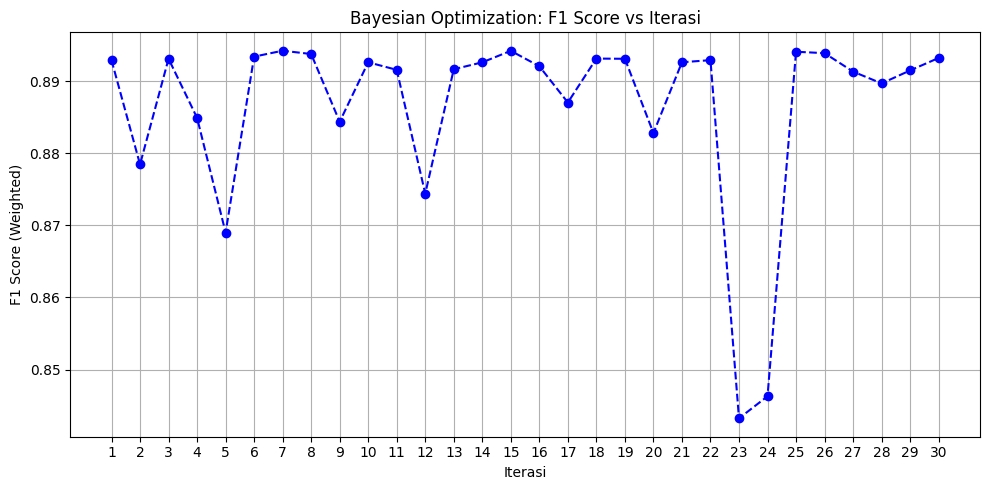

In [33]:
iterations = list(range(1, len(optimizer.res) + 1))
scores = [res["target"] for res in optimizer.res]

plt.figure(figsize=(10, 5))
plt.plot(iterations, scores, marker="o", linestyle="--", color="blue")
plt.title("Bayesian Optimization: F1 Score vs Iterasi")
plt.xlabel("Iterasi")
plt.ylabel("F1 Score (Weighted)")
plt.grid(True)
plt.xticks(iterations)
plt.tight_layout()
plt.savefig(
    os.path.join(plot_dir, "8.bayesian_optimization_f1_score_vs_iterations.png"),
    dpi=300,
    bbox_inches="tight",
)
plt.show()


Penjelasan: 
- Grafik ini menunjukkan bagaimana nilai rata-rata F1 score (dari 3-fold cross-validation) berubah seiring proses iteratif Bayesian Optimization untuk tuning hyperparameter model XGBoost.

Interpretasi:
- Total terdapat **30 iterasi** (5 titik awal + 25 eksplorasi).
- Mayoritas iterasi menghasilkan F1 score tinggi di atas **0.88**, menunjukkan bahwa model stabil terhadap berbagai kombinasi parameter.
- Titik **terendah terjadi pada iterasi ke-23 dan 24**, menunjukkan bahwa kombinasi parameter pada titik tersebut tidak optimal.
- **Puncak performa terlihat konsisten antara iterasi 7 hingga 30**, mendekati nilai **maksimum sekitar 0.893**.
- Ini mengindikasikan bahwa model memiliki **ruang parameter yang cukup stabil dan tidak overfit terhadap titik tertentu**.


In [34]:
print("🔍 Best Result:")
print(optimizer.max)

# Ambil parameter terbaik
best_params = optimizer.max["params"]
best_params["n_estimators"] = int(best_params["n_estimators"])
best_params["max_depth"] = int(best_params["max_depth"])

# Train final model
best_model = XGBClassifier(
    **best_params, use_label_encoder=False, eval_metric="logloss"
)
best_model.fit(X_train_final, y_train_final)

🔍 Best Result:
{'target': 0.8942046454984789, 'params': {'colsample_bytree': 0.8456169847161864, 'learning_rate': 0.1695238090210808, 'max_depth': 6.987150644612907, 'n_estimators': 219.36161761159792, 'subsample': 0.8693230108193144}}


/home/ruvne/anaconda3/envs/py310/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [14:21:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8456169847161864, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1695238090210808,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=219, n_jobs=None,
              num_parallel_tree=None, ...)

Penjelasan:
Setelah 30 iterasi Bayesian Optimization, diperoleh kombinasi parameter terbaik yang menghasilkan F1-score rata-rata tertinggi (**0.8942**), yaitu:

| Parameter            | Nilai Hasil Tuning                      |
|----------------------|------------------------------------------|
| `n_estimators`       | 219                                      |
| `max_depth`          | 7                                        |
| `learning_rate`      | 0.1695                                   |
| `subsample`          | 0.8693                                   |
| `colsample_bytree`   | 0.8456                                   |

Proses Implementasi
- Parameter hasil dari `optimizer.max["params"]` diambil, kemudian `n_estimators` dan `max_depth` dikonversi ke integer.
- Model XGBoost akhir dibuat dengan `use_label_encoder=False` dan `eval_metric="logloss"` untuk kompatibilitas versi XGBoost modern.
- Model kemudian dilatih ulang menggunakan seluruh data latih bersih dan seimbang (`X_train_final`, `y_train_final`).

Tujuan utama pelatihan ulang ini adalah untuk:
- **Menggunakan konfigurasi optimal** yang telah ditemukan melalui proses tuning otomatis.
- Memastikan model benar-benar belajar dari data dengan parameter yang memberikan generalisasi terbaik.

🔍 Model: XGBoost_BayesianOpt
Test Accuracy     : 0.8496
Test F1 Score     : 0.8161


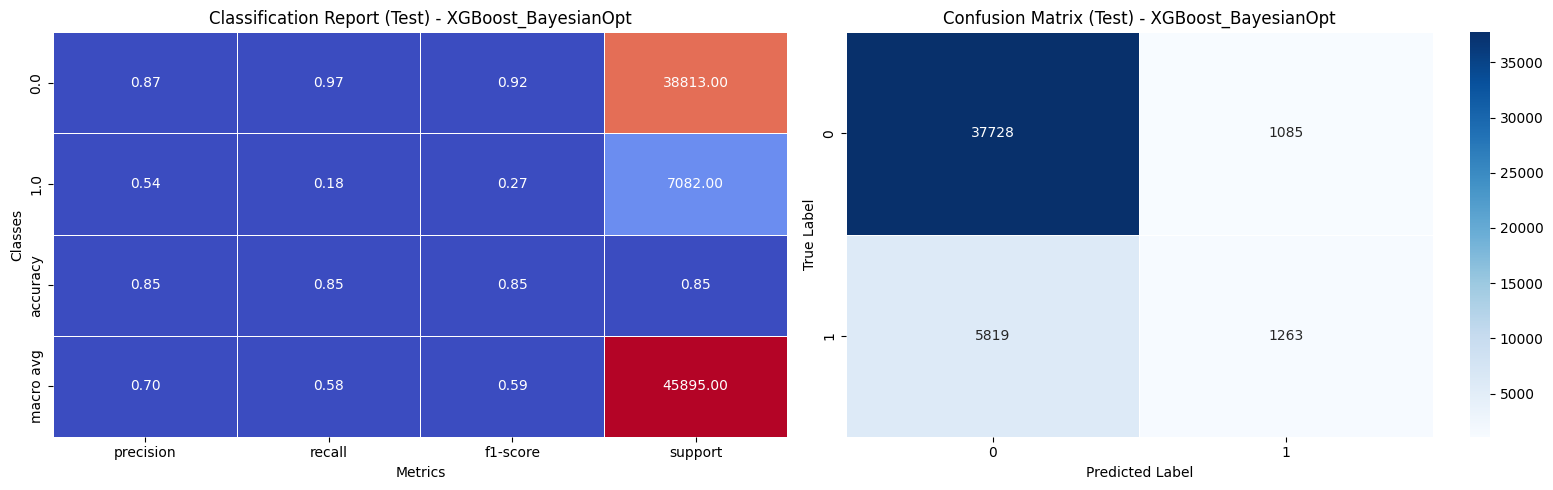

In [35]:
y_test_pred = best_model.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average="weighted")
cr_test = classification_report(y_test, y_test_pred, output_dict=True)
cm_test = confusion_matrix(y_test, y_test_pred)

print("🔍 Model: XGBoost_BayesianOpt")
print(f"Test Accuracy     : {test_accuracy:.4f}")
print(f"Test F1 Score     : {test_f1:.4f}")
print("=" * 40)

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

cr_test_df = pd.DataFrame(cr_test).T
cr_test_df = cr_test_df.iloc[:-1, :]
sns.heatmap(
    cr_test_df,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    ax=axes[0],
    cbar=False,
)
axes[0].set_title("Classification Report (Test) - XGBoost_BayesianOpt", fontsize=12)
axes[0].set_ylabel("Classes", fontsize=10)
axes[0].set_xlabel("Metrics", fontsize=10)

sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", linewidths=0.5, ax=axes[1])
axes[1].set_title("Confusion Matrix (Test) - XGBoost_BayesianOpt", fontsize=12)
axes[1].set_xlabel("Predicted Label", fontsize=10)
axes[1].set_ylabel("True Label", fontsize=10)

plt.tight_layout()
plt.savefig(
    os.path.join(
        plot_dir, "9.XGBoost_BayesianOpt_classification_report_confusion_matrix.png"
    ),
    dpi=300,
    bbox_inches="tight",
)
plt.show()


## 🧪 Evaluasi Akhir Model XGBoost (Bayesian Optimization)

### 🔍 Model: `XGBoost_BayesianOpt`
Setelah dilakukan pelatihan ulang model menggunakan kombinasi hyperparameter terbaik hasil tuning, model dievaluasi terhadap data uji (`X_test_scaled`, `y_test`).

---

### 📊 Hasil Evaluasi:

- **Accuracy (akurasi keseluruhan)**: `0.8496`
- **F1 Score (weighted)**: `0.8161`

---

### 📈 Interpretasi Grafik:

#### 🔹 Classification Report Heatmap:
- **Precision kelas 0 (non-diabetes)**: `0.87` → model sangat akurat dalam mengenali non-diabetes.
- **Recall kelas 0**: `0.97` → hampir semua non-diabetes berhasil dikenali.
- **Precision kelas 1 (diabetes)**: `0.54`
- **Recall kelas 1**: `0.18` → model masih kesulitan mengenali semua kasus diabetes.
- **F1-score kelas 1**: `0.27` → meskipun meningkat dibandingkan baseline awal, masih tergolong rendah.
- **Macro average** menunjukkan ketidakseimbangan performa antar kelas, namun cukup baik secara keseluruhan.

#### 🔹 Confusion Matrix:
- **True Positives (TP)**: 1.263 → jumlah prediksi benar untuk diabetes.
- **False Negatives (FN)**: 5.819 → jumlah kasus diabetes yang tidak terdeteksi (masih tinggi).
- **False Positives (FP)**: 1.085 → non-diabetes yang salah diprediksi sebagai diabetes (rendah).
- **True Negatives (TN)**: 37.728 → non-diabetes yang diprediksi dengan benar (sangat tinggi).

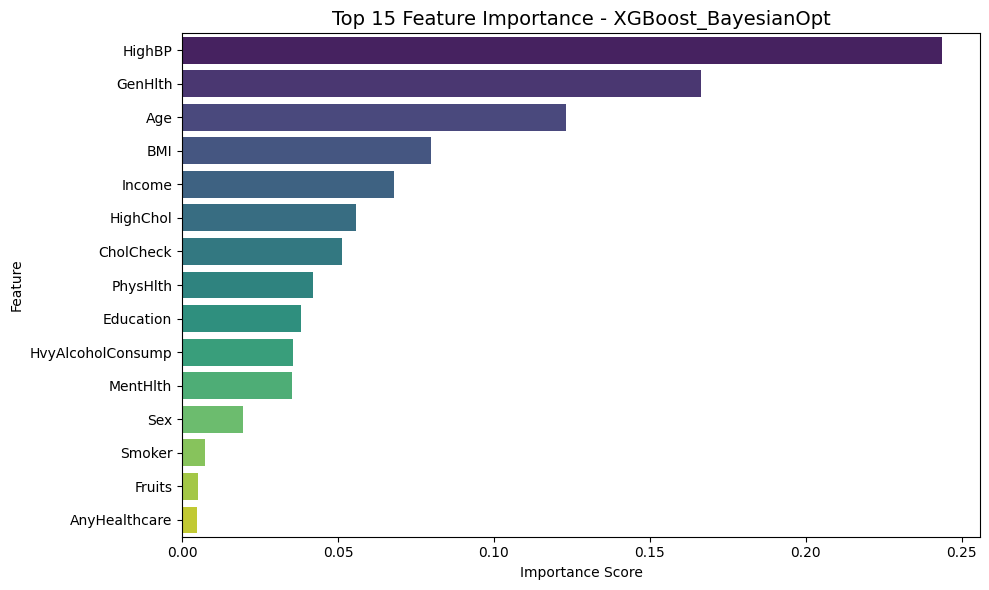

In [36]:
importances = best_model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame(
    {"Feature": feature_names, "Importance": importances}
).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=importance_df.head(15),
    x="Importance",
    y="Feature",
    hue="Feature",
    palette="viridis",
    dodge=False,
    legend=False,
)
plt.title("Top 15 Feature Importance - XGBoost_BayesianOpt", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig(
    os.path.join(plot_dir, "10.XGBoost_BayesianOpt_feature_importance.png"),
    dpi=300,
    bbox_inches="tight",
)
plt.show()

Penjelasan:
- `HighBP` (tekanan darah tinggi) menjadi fitur paling berpengaruh terhadap klasifikasi diabetes. Hal ini sejalan dengan banyak literatur medis yang menunjukkan hubungan erat antara hipertensi dan risiko diabetes tipe 2.
- `GenHlth` (penilaian kesehatan umum oleh individu) berada di urutan kedua, menunjukkan bahwa persepsi kesehatan pribadi berkorelasi dengan kondisi diabetes.
- `Age` menempati posisi ketiga, memperkuat temuan dari EDA bahwa risiko diabetes meningkat pada kelompok usia paruh baya dan lanjut usia.
- `BMI`, `Income`, dan `HighChol` juga termasuk fitur penting, yang menunjukkan bahwa faktor gaya hidup dan status sosial ekonomi memainkan peran signifikan dalam prediksi diabetes.
- Fitur seperti `Fruits`, `Smoker`, dan `AnyHealthcare` memiliki skor yang rendah, artinya model tidak banyak menggunakan informasi dari fitur ini dalam proses pengambilan keputusan.
